In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"{x_train.shape}, {y_train.shape}")
print(f"{x_test.shape}, {y_test.shape}")

(60000, 28, 28), (60000,)
(10000, 28, 28), (10000,)


In [4]:
import matplotlib.pyplot as plt

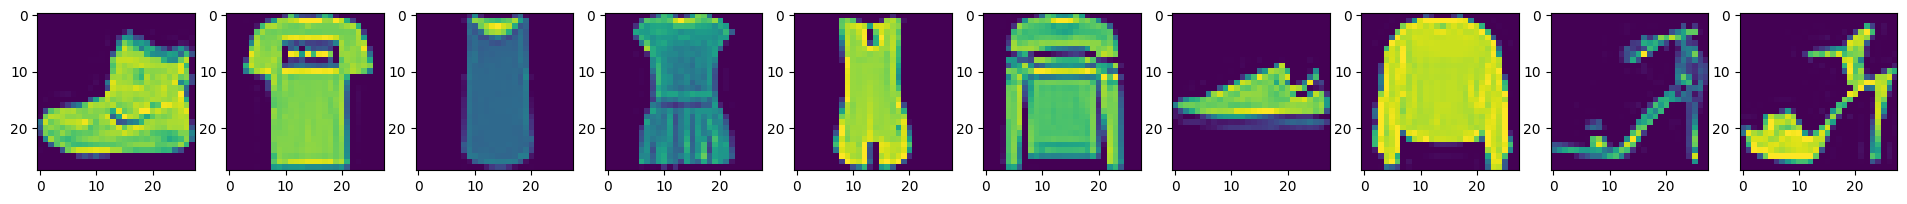

In [5]:
fig, axes = plt.subplots(figsize=(24, 10), nrows=1, ncols=10)

for i in range(10):
    img = x_train[i]
    axes[i].imshow(img)

label

0 : Tshirt / top

1 :Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankle boot

In [6]:
import numpy as np

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
x_train_scale = (x_train / 255.0).reshape(60000, 28 * 28)
x_test_scale = (x_test / 255.0).reshape(10000, 28 * 28)

In [9]:
print(x_train_scale.shape)

(60000, 784)


In [10]:
print(x_test_scale.shape)

(10000, 784)


In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [14]:
print(y_train_cate[0])
print(y_test_cate[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

In [20]:
model.add(Dense(32, input_shape=(784, ), activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

c:\Users\user\anaconda3\envs\multi02_tensor\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [22]:
result = model.fit(x_train_scale, y_train_cate, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7311 - loss: 0.7488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8555 - loss: 0.3994
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8692 - loss: 0.3599
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8755 - loss: 0.3399
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8809 - loss: 0.3258
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8866 - loss: 0.3071
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8878 - loss: 0.2966
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8942 - loss: 0.2877
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8924 - loss: 0.2835
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8980 - loss: 0.2741


In [23]:
model.evaluate(x_test_scale, y_test_cate)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8692 - loss: 0.3851


[0.3759502172470093, 0.8707000017166138]

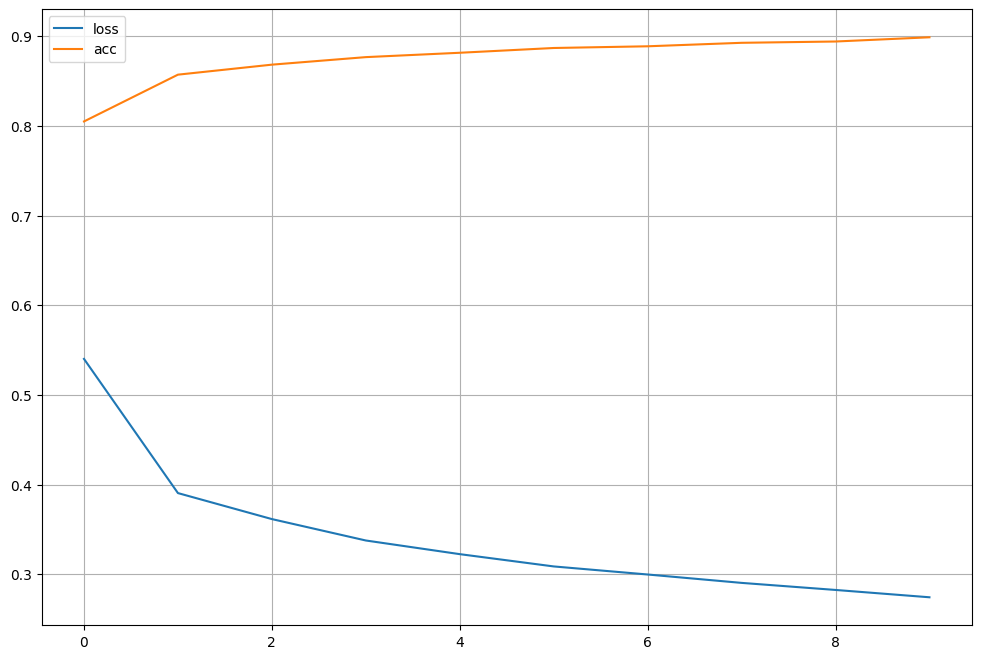

In [26]:
names = ["loss", "acc"]

plt.figure(figsize=(12, 8))

for name in names:
    plt.plot(result.history[name], label=name)

plt.legend()
plt.grid()
plt.show()

In [29]:
predict = model.predict(x_test_scale)

predict_labels = np.argmax(predict, axis=1)
y_test_labels = np.argmax(y_test_cate, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


In [30]:
print(predict_labels)
print(y_test_labels)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [31]:
wrong_list = []

for i in range(0, len(y_test)):
    if predict_labels[i] != y_test_labels[i]:
        wrong_list.append(i)

print(wrong_list)
print(len(wrong_list))

[17, 21, 23, 25, 40, 42, 49, 51, 66, 68, 89, 107, 117, 127, 135, 141, 147, 150, 151, 153, 163, 192, 221, 222, 239, 241, 244, 249, 255, 282, 283, 285, 286, 299, 314, 316, 324, 325, 344, 354, 359, 361, 378, 379, 381, 382, 396, 404, 406, 407, 409, 413, 441, 444, 454, 457, 460, 474, 476, 490, 512, 529, 541, 548, 562, 563, 565, 569, 572, 577, 581, 586, 587, 595, 623, 628, 634, 635, 637, 639, 663, 664, 669, 670, 681, 685, 688, 689, 701, 706, 711, 716, 722, 725, 726, 732, 753, 760, 761, 787, 800, 801, 805, 823, 851, 860, 877, 881, 902, 905, 907, 909, 920, 921, 930, 939, 963, 965, 966, 967, 971, 976, 977, 979, 993, 994, 995, 1000, 1004, 1005, 1016, 1025, 1046, 1051, 1053, 1054, 1055, 1056, 1058, 1064, 1082, 1094, 1101, 1104, 1107, 1111, 1124, 1129, 1131, 1139, 1142, 1152, 1160, 1162, 1165, 1174, 1177, 1186, 1188, 1210, 1213, 1223, 1231, 1235, 1249, 1251, 1254, 1277, 1294, 1297, 1300, 1306, 1315, 1326, 1329, 1334, 1336, 1339, 1341, 1343, 1374, 1388, 1396, 1399, 1408, 1425, 1449, 1455, 1458, 146

In [32]:
import random

In [33]:
samples = random.choices(population=wrong_list, k=16)
samples

[6997,
 920,
 3015,
 805,
 967,
 460,
 8758,
 1016,
 4979,
 6797,
 4405,
 3087,
 1792,
 3255,
 979,
 6844]

In [35]:
labels = ["T-shirt//top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
          "Shirt", "Sneaker", "Bag", "Ankle boot"]

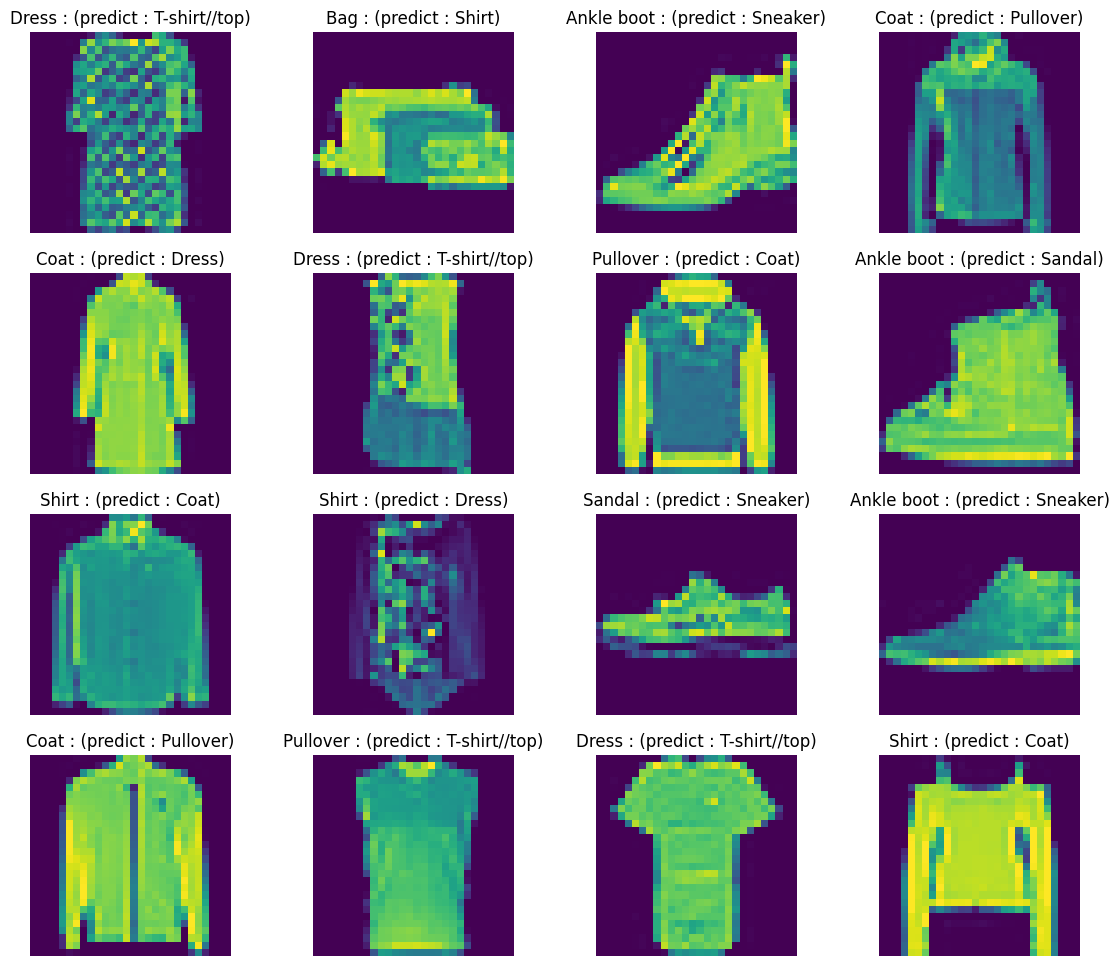

In [36]:
plt.figure(figsize=(14, 12))

for idx, sample in enumerate(samples):
    plt.subplot(4, 4, idx+1)

    plt.imshow(x_test[sample].reshape(28, 28))
    plt.title(f"{labels[y_test_labels[sample]]} : (predict : {labels[predict_labels[sample]]})")
    plt.axis("off")